## Case Study #2

In [34]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [2]:
# import data
data = pd.read_csv("C:/Users/pc/Desktop/casestudy.csv")

In [3]:
data

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


In [29]:
# Create a new dataframe to display required information for each year
result = pd.DataFrame(index = ['2015','2016','2017'],columns = ['Total revenue for the current year','New Customer Revenue','Existing Customer Growth','Revenue lost from attrition','Existing Customer Revenue Current Year','Existing Customer Revenue Prior Year','Total Customers Current Year','Total Customers Previous Year','New Customers','Lost Customers'])

In [30]:
# Filter basic datasets

In [35]:
data_2015= data[data['year'] == 2015]
data_2016= data[data['year'] == 2016]
data_2017= data[data['year'] == 2017]

revenue_2015 = data_2015.iloc[:,2].sum()
revenue_2016 = data_2016.iloc[:,2].sum()
revenue_2017 = data_2017.iloc[:,2].sum()

customers_2015 = data_2015.iloc[:,1].tolist()
customers_2016 = data_2016.iloc[:,1].tolist()
customers_2017 = data_2017.iloc[:,1].tolist()

new_customer_2016 = list(set(customers_2016) - set(customers_2015))
data_new_customers_2016 = data_2016[data_2016['customer_email'].isin(new_customer_2016)]
lost_customer_2016 = list(set(customers_2015) - set(customers_2016))
data_lost_customers_2016 = data_2015[data_2015['customer_email'].isin(lost_customer_2016)]

new_customer_2017 = list(set(customers_2017) - set(customers_2016))
data_new_customers_2017 = data_2017[data_2017['customer_email'].isin(new_customer_2017)]
lost_customer_2017 = list(set(customers_2016) - set(customers_2017))
data_lost_customers_2017 = data_2016[data_2016['customer_email'].isin(lost_customer_2017)]

existing_customer_2016 = list(set(customers_2016) & set(customers_2015))
data_existing_customers_2016 = data_2016[data_2016['customer_email'].isin(existing_customer_2016)]

existing_customer_2017 = list(set(customers_2017) & set(customers_2016))
data_existing_customers_2017 = data_2017[data_2017['customer_email'].isin(existing_customer_2017)]

In [36]:
# Calculate / sort required information
#•	Total revenue for the current year
result.iloc[0,0] = revenue_2015
result.iloc[1,0] = revenue_2016
result.iloc[2,0] = revenue_2017

#•	New Customer Revenue e.g., new customers not present in previous year only    
# result.iloc[0,1] = data_new_customers_2015.iloc[:,2].sum()
result.iloc[1,1] = data_new_customers_2016.iloc[:,2].sum()
result.iloc[2,1] = data_new_customers_2017.iloc[:,2].sum()

#•	Existing Customer Revenue Current Year
result.iloc[1,4] = data_existing_customers_2016.iloc[:,2].sum()
result.iloc[2,4] = data_existing_customers_2017.iloc[:,2].sum()

#•	Existing Customer Revenue Prior Year
data_existing_customers_2016_pre = data_2015[data_2015['customer_email'].isin(existing_customer_2016)]
data_existing_customers_2017_pre = data_2016[data_2016['customer_email'].isin(existing_customer_2017)]
result.iloc[1,5] = data_existing_customers_2016_pre.iloc[:,2].sum()
result.iloc[2,5] = data_existing_customers_2017_pre.iloc[:,2].sum()

#•	Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year
result.iloc[1,2] = result.iloc[1,4] - result.iloc[1,5]
result.iloc[2,2] = result.iloc[2,4] - result.iloc[2,5]

#•	Revenue lost from attrition
result.iloc[1,3] = data_lost_customers_2016.iloc[:,2].sum()
result.iloc[2,3] = data_lost_customers_2017.iloc[:,2].sum()

#•	Total Customers Current Year
result.iloc[0,6] = len(data_2015)
result.iloc[1,6] = len(data_2016)
result.iloc[2,6] = len(data_2017)

#•	Total Customers Previous Year
result.iloc[1,7] = len(data_2015)
result.iloc[2,7] = len(data_2016)

#•	New Customers
result.iloc[1,8] = len(data_new_customers_2016)
result.iloc[2,8] = len(data_new_customers_2017)

#•	Lost Customers
result.iloc[1,9] = len(data_lost_customers_2016)
result.iloc[2,9] = len(data_lost_customers_2017)

In [37]:
result

,Total revenue for the current year,New Customer Revenue,Existing Customer Growth,Revenue lost from attrition,Existing Customer Revenue Current Year,Existing Customer Revenue Prior Year,Total Customers Current Year,Total Customers Previous Year,New Customers,Lost Customers
2015,29036749.19,NaN,NaN,NaN,NaN,NaN,231294,NaN,NaN,NaN
2016,25730943.59,18245491.01,20335.46,21571632.07,7485452.58,7465117.12,204646,231294,145062,171710
2017,31417495.03,28776235.04,20611.34,23110294.94,2641259.99,2620648.65,249987,204646,229028,183687


In [42]:
result['current average'] = result['Total revenue for the current year']/result['Total Customers Current Year']
result['new average'] = result['New Customer Revenue']/result['New Customers']
result['lost average'] = result['Revenue lost from attrition']/result['Lost Customers']

In [43]:
result

,Total revenue for the current year,New Customer Revenue,Existing Customer Growth,Revenue lost from attrition,Existing Customer Revenue Current Year,Existing Customer Revenue Prior Year,Total Customers Current Year,Total Customers Previous Year,New Customers,Lost Customers,current average,new average,lost average
2015,29036749.19,NaN,NaN,NaN,NaN,NaN,231294,NaN,NaN,NaN,125.540434,NaN,NaN
2016,25730943.59,18245491.01,20335.46,21571632.07,7485452.58,7465117.12,204646,231294,145062,171710,125.733919,125.777192,125.628281
2017,31417495.03,28776235.04,20611.34,23110294.94,2641259.99,2620648.65,249987,204646,229028,183687,125.676515,125.645052,125.813449


## Plot

### A few insights from the result:
<br/>1) Total revenue has been constantly increasing throughout 2015-2017 
<br/>2) From the total revenue, new customer revenue accounts for a major part, and is increasingly important
<br/>3) Existing customer growing slight larger than last year
<br/>4) Revenue lost from attrition is huge compared with previous year revenue
<br/>5) As to total number of customers, it is fluctuating while we may see that it attracts growing numbers of new customers, while maintaining a stable lost customer number.
<br/>6) When calculating the spending power of each customer, we may from that average current customer expenditure is relatively constant through the three years, and so do new average and lost average.

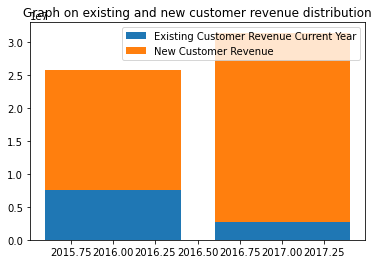

In [81]:
#fig, ax = plt.subplots(figsize = (6,10))
plt.bar([2016,2017],result['Existing Customer Revenue Current Year'][1:],label = 'Existing Customer Revenue Current Year')
plt.bar([2016,2017],result['New Customer Revenue'][1:], bottom = result['Existing Customer Revenue Current Year'][1:],label = 'New Customer Revenue')

#ax.set_ylabel('number')
plt.title('Graph on existing and new customer revenue distribution')
plt.legend()
# plt.xticks(rotation = 300)
plt.show()


Text(0, 0.5, 'number of customers')

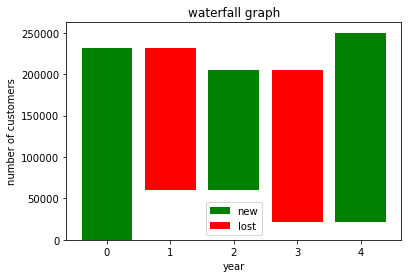

In [86]:
# A waterfall graph denoting the change of number of consumers
data1 = pd.read_csv("C:/Users/pc/Desktop/change in customers.csv")
customer = data1['change']
bottom1 = 0
bar_width = 0.8
x_idx = np.arange(len(customer),dtype = np.float64)

for i in customer.index:
    x = x_idx[i]
    y = customer[i]
    if data1['change'][i]>0:
        label1 = "new"
        new = plt.bar(x,y,bar_width, align = "center", bottom = bottom1, label = label1, color = "green")
    else:
        label1 = "lost"
        lost = plt.bar(x,y,bar_width, align = "center", bottom = bottom1, label = label1, color = "red")
    bottom1 += y
    x += 0.8

plt.legend(handles = [new, lost])
plt.title("waterfall graph")
plt.xlabel("year")
plt.ylabel("number of customers")
    